Mestna občina Ljubljana je objavila [video o vedenju kolesarjev v Ljubljani](https://www.youtube.com/watch?v=nmhrbzplGX4). Na kratko: kolesarji so znani po divjih spustih po stopnicah, divjanju med pešci in tako naprej.<sup>*</sup> Ker je osnovno prevozno sredstvo vašega profesorja kolo in ker tretjino letne kilometrine žal opravi v Ljubljani, vas prosi, da mu za lažje načrtovanje poti rešite tole nalogo.

---

Zemljevid na sliki kaže 21 točk v Ljubljani (zaradi varstva osebnih podatkov smo imena lokacij zamenjali s črkami od A do V) in povezave med njimi. Povezave zahtevajo različne veščine: kdor hoče, na primer priti iz točke B do C, mora obvladati vožnjo med odvrženimi skiroji in slalom med cvetličnimi lonci.

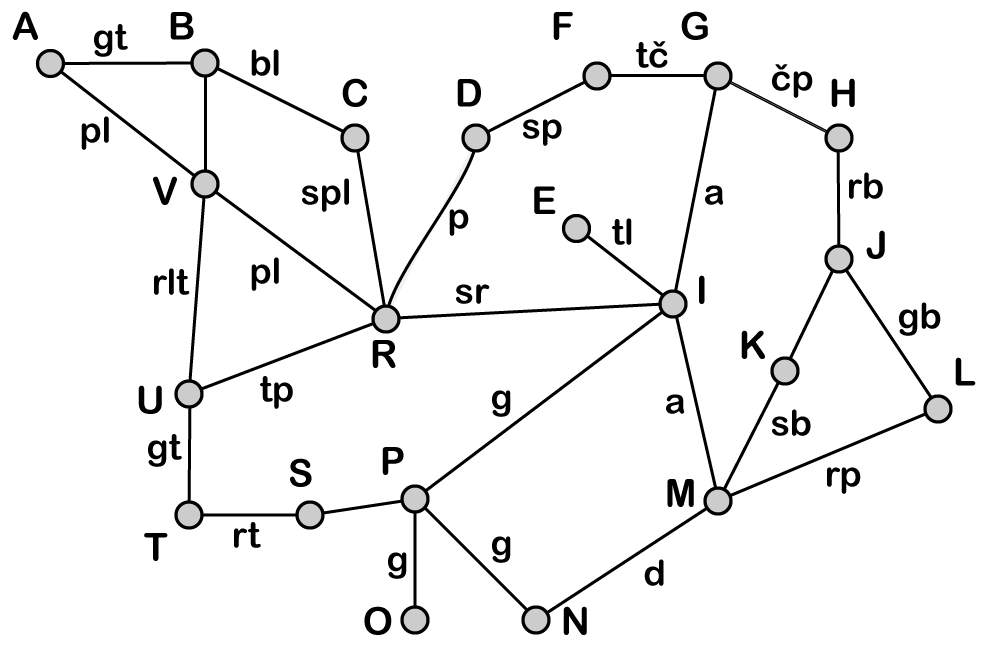

Celoten seznam veščin, ki se pojavljajo v nalogi, je:

- **s**topnice: Spust po stopnicah
- **p**ešci: Divjanje med pešci
- **l**onci: Slalom med cvetličnimi lonci
- **b**olt: Slalom med odvrženimi skiroji
- **r**obnik: Skok na robnik pločnika
- **g**ravel: Vožnja po razsutem makadamu
- **t**rava: Oranje zelenic parkov
- **a**vtocesta: Vožnja po avtocesti
- **c**repinje: Vožnja po razbiti steklovini
- ro**d**eo: Vožnja po kolesarski poti skozi Črnuče

Zemljevid na sliki zaradi pomanjkanja prostora uporablja enočrkovne okrajšave veščin, v sami nalogi pa je zapisan takole:

```
A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, R, S, T, U, V = "ABCDEFGHIJKLMNOPRSTUV"

zemljevid = {
    (A, B): "gravel trava",
    (A, V): "pešci lonci",
    (B, C): "bolt lonci",
    (B, V): "",
    (C, R): "stopnice pešci lonci",
    (D, F): "stopnice pešci",
    (D, R): "pešci",
    (E, I): "trava lonci",
    (F, G): "trava črepinje",
    (G, H): "črepinje pešci",
    (G, I): "avtocesta",
    (H, J): "robnik bolt",
    (I, M): "avtocesta",
    (I, P): "gravel",
    (I, R): "stopnice robnik",
    (J, K): "",
    (J, L): "gravel bolt",
    (K, M): "stopnice bolt",
    (L, M): "robnik pešci",
    (M, N): "rodeo",
    (N, P): "gravel",
    (O, P): "gravel",
    (P, S): "",
    (R, U): "trava pešci",
    (R, V): "pešci lonci",
    (S, T): "robnik trava",
    (T, U): "gravel trava",
    (U, V): "robnik lonci trava"
}
```

Ključi zemljevida so pari povezanih točk, pripadajoča vrednost pa je niz, ki vsebuje s presledkom ločene okrajšave veščin. Tako vidimo pod ključem `(B, C)` zapisano `"bolt lonci"`, kar je okrajšava za veščini *Slalom med odvrženimi skiroji* in *Slalom med cvetličnimi lonci*.

Vse povezave so dvosmerne (ker je kolesarjem po mnenju MOL itak vseeno, v katero smer in po kateri strani ceste vozijo). Če obstaja povezava med B in C obstaja tudi med C in B ter zahteva enake veščine.

## Obvezna naloga

Napiši naslednje funkcije

- `mnozica_vescin(s)` prejme niz z okrajšanimi imeni veščin, ločenimi s presledkom in vrne množico s polnimi imeni teh veščin. Klic `mnozica_vescin("robnik bolt stopnice")` vrne `{"Divjanje med pešci", "Oranje zelenic parkov", "Spust po stopnicah"}`.

    Rešitev, ki vsebuje čreva v slogu

    ```python
    if vescina == "trava":
        ...
    elif vescina == "gravel":
        ...
    elif vescina == "robnik":
        ...
    ```

    ne bo priznana kot pravilna. Lepo uporabite, kar smo se učili na predavanjih. Iz tega razloga funkcija `mnozica_vescin` ne sme vsebovati pogojnih stavkov, v nalogi pa (izjemoma) ne smete definirati dodatnih funkcij (razen zahtevanih).
    
#### Rešitev

Glavni namen te naloge je bil, da uporabite slovar. Zato in samo zato sem zahteval, da jo naredite brez `if`. Rešitev je torej:

In [1]:
kodirnik = {
    "stopnice": "Spust po stopnicah",
    "pešci": "Divjanje med pešci",
    "lonci": "Slalom med cvetličnimi lonci",
    "bolt": "Slalom med odvrženimi skiroji",
    "robnik": "Skok na robnik pločnika",
    "gravel": "Vožnja po razsutem makadamu",
    "trava": "Oranje zelenic parkov",
    "avtocesta": "Vožnja po avtocesti",
    "črepinje": "Vožnja po razbiti steklovini",
    "rodeo": "Vožnja po kolesarski poti skozi Črnuče"
}

def mnozica_vescin(s):
    vescine = set()
    for koda in s.split():
        vescine.add(kodirnik[koda])
    return vescine

Slovar je lahko definiran znotraj funkcije ali izven.

Žal pa nič ni tako preprosto, da se ne bi dalo zaplesti. Mnogi študenti so tu - bogsigavedi, zakaj - namesto `s.split()` napisali `s.split(" ")`. To vodi v velike sitnosti, saj se `split` z argumenti vede precej drugače kot brez ([dokumentacija](https://docs.python.org/3.3/library/stdtypes.html?highlight=split#str.split)).

```
>>> "a   b   c".split()
['a', 'b', 'c']
>>> "a   b   c".split(" ")
['a', '', '', 'b', '', '', 'c']
>>> "  a b   c  ".split()
['a', 'b', 'c']
>>> "  a b   c  ".split(" ")
['', '', 'a', 'b', '', '', 'c', '', '']
>>> "".split()
[]
>>> "".split(" ")
['']
```

Pri tej nalogi vas tepe zadnje: v enem od testov, ki sem jih dodal kar tako, ne da bi se zavedal, kakšne sitnosti vam bo povzročal, dobi funkcija prazen niz in vrniti mora prazno množico. Gornja rešitev s tem opravi, ne da bi se morala za to truditi: `"".split()` vrne prazen seznam in zanka, ki dekodira nize in dodaja veščine, se pač ne izvede nikoli, zato ostane množica prazna.

Ne tako, če uporabite `split(" ")`. Ta vrne seznam, ki vsebuje prazen niz. Tega ni med veščinami in slovar vrne `KeyError`. Vsaj ena študentka je ukrepala tako, da je dodala še veščino `""` in jo potem na koncu funkcije z `vescine -= {""}` pobrisala. Duhovito. Ostali so na začetek funkcije pisali `if s == "": return set()` in testi so padli zaradi `if`-a. Pri čemer je imela prepoved `if`-ov sicer čisto drug namen.

Nauk: če želite deliti glede na prazni prostor, kličite `split` brez argumentov, saj `split` z argumenti navadno ne bo naredil tistega, kar želite.

#### Naloga (nadaljevanje)

- `dvosmerni_zemljevid(zemljevid)` prejme zemljevid (slovar, kakršen je gornji) in vrne **nov zemljevid**, ki se od podanega razlikuje po tem, da 

    - se vse povezave pojavijo tudi v obrnjeni smeri (če je v podanem zemljevidu ključ `(B, C)`, je v vrnjenem zemljevidu poleg njega tudi ključ `(C, B)`);
    - so nizi okrajšav zamenjani z množicami, kakršne vrača funkcija `mnozica_vescin`.

    Klic 

    ```python
    dvosmerni_zemljevid({(A, B): "robnik bolt",
                         (A, C): "bolt rodeo pešci",
                         (C, D): ""}
    ```
  
    vrne

    ```
    {('A', 'B'): {'Slalom med odvrženimi skiroji',
                  'Skok na robnik pločnika'},
     ('B', 'A'): {'Slalom med odvrženimi skiroji',
                  'Skok na robnik pločnika'},
     ('A', 'C'): {'Divjanje med pešci',
                  'Slalom med odvrženimi skiroji',
                  'Vožnja po kolesarski poti skozi Črnuče'},
     ('C', 'A'): {'Divjanje med pešci',
                  'Slalom med odvrženimi skiroji',
                  'Vožnja po kolesarski poti skozi Črnuče'},
     ('C', 'D'): set(),
     ('D', 'C'): set()}
    ```

    **Toplo priporočam,** da to funkcijo uporabite v nekaterih od naslednjih funkcij.
    
#### Rešitev

Ta naloga ni imela posebnega pedagoškega smotra. To funkcijo ste pisali samo zato, da vam olajša življenje v nadaljevanju. Vseeno se je pokazalo nekaj zanimivih reči.

"Pravilna" rešitev je takšna:

In [2]:
def dvosmerni_zemljevid(zemljevid):
    dvosmerni = {}
    for (a, b), v in zemljevid.items():
        dvosmerni[(a, b)] = dvosmerni[(b, a)] = mnozica_vescin(v)
    return dvosmerni

Pisali bi lahko tudi `dvosmerni[a, b]` in `dvosmerni[b, a]`, brez dodatnih oklepajev okrog `a` in `b`. Python kot indeks uporabi tisto, kar je med oglatimi oklepaji in če je tam več stvari ločenih z vejico, je to zanj pač terka. Sam raje dodam oklepaje, saj v knjižnici `numpy`, ki je namenjena delu z večdimenzionalnimi tabelami in je v praksi glavni motor Pythona, z dvema indeksoma indeksiramo dvodimenzionalne tabele in tam o njima ne razmišljamo kot o terki (čeprav v resnici sta). Skratka, zaradi preglednosti tule raje eksplicitno pokažem, da gre za terko.

Precej običajna komplikacija je bila, da so študenti prirejali dvakrat.

```
        dvosmerni[(a, b)] = mnozica_vescin(v)
        dvosmerni[(b, a)] = mnozica_vescin(v)
```

S tem ne bi bilo nič narobe, ako ne bi pomenilo, da dvakrat pokličemo `mnozica_vescin`. Da bi se temu izognili, bi morali pisati

```
        vescine = mnozica_vescin(v)
        dvosmerni[(a, b)] = vescine
        dvosmerni[(b, a)] = vescine
```

Tako pa smo namesto ene kratke vrstice pridelali že tri.

Drugo, kar mi je padlo v oči, so težave z razpakiranjem ključev. Mnogi so namesto `for (a, b), v in zemljevid.items():` pisali `for k, v in zemljevid.items():` (opomba: `k` in `v` sta pogosto imeni, ki ju dodelimo kakim generičnim, splošnim **k**ljučem in **v**rednostim, kar posrečeno sovpada tudi z angleškim **k**ey in **v**value; pri prvi besedi gre za isti etimološki izvor, pri drugi za naključje). Zdaj `k` vsebuje oba ključa. Ustrezno prirejanje bi lahko bilo kar

```
    dvosmerni[k] = dvosmerni[k[::-1] = mnozica_vescin(v)
```

vendar študenti za kaj takega večinoma niso dovolj pogumni in raje pišejo

```
    dvosmerni[kljuc[0], kljuc[1]] = dvosmerni[kljuc[1], kljuc[0]] = mnozica_vescin(v)
```

ali pa še kaj hujšega.

#### Naloga (nadaljevanje)

- `mozna_pot(pot, zemljevid)` prejme `pot` v obliki niza z zaporedjem križišč in `zemljevid` v obliki iz uvoda naloge. Funkcija mora vrniti `True`, če je takšna pot možna (torej: če obstajajo povezave med vsemi zaporednimi križišči v nizu) in `False`, če ni.

    Klic `mozna_pot("ABCRVRIEIPNM", zemljevid)` vrne `True`, klic `mozna_pot("ABCRVREPNM", zemljevid)` pa `False`, ker ni povezave iz R v E.

#### Rešitev

Bože, kaj se je dogajalo pri tej nalogi! :) Rešitev je preprosta: gremo čez pare, za vsakega pogledamo, ali nastopa (kot ključ) v slovarju, in čim zalotimo takšnega, ki ne, zatulimo "FALSCH!". Če preživimo do konca, pa `True`.

In [3]:
def mozna_pot(pot, zemljevid):
    zemljevid = dvosmerni_zemljevid(zemljevid)
    for a, b in zip(pot, pot[1:]):
        if (a, b) not in zemljevid:
            return False
    return True

Preden nadaljujemo, opazímo tole: znotraj funkcije smo naredili spremenljivko `zemljevid`, ki povozi tisto, ki smo jo dobili kot argument. Točneje, znotraj funkcije se ime `zemljevid` nanaša najprej nanaša na slovar, ki smo ga dobili kot argument, od prve vrstice naprej pa na slovar, ki ga na podlagi dobljenega slovarja sestavi `dvosmerni_zemljevid`. S tem ni nič narobe, to ni spremenilo slovarja, ki smo ga dobili kot argument. Morda bi imel nekoliko prav, kdor bi se pritoževal, da s spreminjanjem tega, na kar se nanaša `zemljevid`, ustvarjamo zmedo. Vendar gledam na to tako, kot da je funkcija `dvosmerni_zemljevid` zgolj "dopolnila" podani zemljevid s povezavami v nasprotno smer. Izgovorim se lahko tudi, da smo to naredili čisto na začetku funkcije. V splošnem pa bi imel v prejšnjem stavku omenjeni kritik prav: če se neko ime v prvi polovici funkcije nanaša na nekaj, v drugi polovici pa na nekaj drugega, bi bilo to zelo slabo, nepregledno, zavajajoče, nevarno.

Gre tudi malenkost krajše.

In [4]:
def mozna_pot(pot, zemljevid):
    zemljevid = dvosmerni_zemljevid(zemljevid)
    for povezava in zip(pot, pot[1:]):
        if povezava not in zemljevid:
            return False
    return True

Če rečemo, da morajo vse povezave nastopati kot ključi v slovarju, mora biti množica povezav podmnožica množice ključev, in rešitev je potemtakem lahko kar:

In [5]:
def mozna_pot(pot, zemljevid):
    return set(zip(pot, pot[1:])) <= set(dvosmerni_zemljevid(zemljevid))

Prav ta teden pa se bomo bomo učili, da se da ono različico z zanko napisati tudi učinkoviteje:

In [6]:
def mozna_pot(pot, zemljevid):
    zemljevid = dvosmerni_zemljevid(zemljevid)
    return all(povezava in zemljevid for povezava in zip(pot, pot[1:]))

Najbolj tipična komplikacija tule je bila, da niste uporabili `zip`-a, temveč `range(len(pot))` in indekse. To je potem izgledalo tako:

In [7]:
def mozna_pot(pot, zemljevid):
    zemljevid = dvosmerni_zemljevid(zemljevid)
    for i in range(len(pot) - 1):
        if (pot[i], pot[i + 1]) not in zemljevid:
            return False
    return True

To ni spodobno, je pa še OK. Veliko manj OK so vse rešitve, ki iz kakega razloga delajo zanko čez `zemljevid`. To je počasno in ne izkorišča tega, kar nam nudijo slovarji. Slovarjev, nimamo zato, da bi delali zanke čeznje, temveč zato, da ne bi delali zank čeznje.

Zelo pogosto sem videval tudi rešitve, ki najprej zgradijo seznam povezav in gredo nato čezenj, recimo takole (ali pa, še bolj zapleteno, z `range` ali celo kaj daljšega):

In [8]:
def mozna_pot(pot, zemljevid):
    zemljevid = dvosmerni_zemljevid(zemljevid)
    
    povezave = []
    for a, b in zip(pot, pot[1:]):
        povezave.append((a, b))
        
    for povezava in povezave:
        if povezava not in zemljevid:
            return False
    return True

To je nepotrebno prelaganje podatkov med seznami. S tem ne pridobimo ničesar, razen priložnosti za napake.

#### Naloga (nadaljevanje)

- `potrebne_vescine(pot, zemljevid)` prejme enake argumente kot prejšnja funkcija, s tem da bo pot, ki jo prejme, bo vedno možna. Funkcija mora vrniti množico veščin, ki jih mora kolesar obvladati, če želi prevoziti to pot.

    Klic `potrebne_vescine("RIPSTUT", zemljevid)` vrne

    ```
    {'Skok na robnik pločnika',
     'Spust po stopnicah',
     'Vožnja po razsutem makadamu',
     'Oranje zelenic parkov'}
    ```
  
    saj so to veščine, ki jih potrebujemo za to pot (na zemljevidu označene kot *sr*, *g*, *rt* in *gt*). 

#### Rešitev

Naloga je malo podobna prejšnji, le da namesto preverjanja, ali je pot možna, sestavi množico in vanjo dodaja veščine, potrebne za vsako povezavo.

In [9]:
def potrebne_vescine(pot, zemljevid):
    zemljevid = dvosmerni_zemljevid(zemljevid)
    vescine = set()
    for povezava in zip(pot, pot[1:]):
        vescine |= zemljevid[povezava]
    return vescine

Tudi to funkcijo lahko po nepotrebnem zapletemo na enake načine kot zgornjo. Pa še na enega zraven - in to je naredilo veliko študentov. Namesto

```
        vescine |= zemljevid[povezava]
```

so pisali

```
        for vescina in zemljevid[povezava]:
            vescine.add(povezava)
```

Če želimo v neko množico dodati vse elemente neke druge množice, je to pač unija.

Nekateri so bili še previdnejši in pred dodajanjem preverili, da ni element slučajno že v množici, `if povezava not in vescine`. Tudi to je nepotrebno. Množica ne more dvakrat vsebovati istega elementa.

Nekatere je zmotilo, da njihove množice ne vsebujejo elementov v enakem vrstnem redu, v kakršnem so navedene v rešitvi. Kot sem opozoril na predavanju, vrstni red elementov v množici ni določen. Lahko se spreminja med izvajanjem. In vsakič, ko poženete program, je lahko drugačen. Množice nimajo koncepta "vrstnega reda", zato ta ni pomemben.

In [10]:
{1, 2, 3, 4} == {2, 1, 4, 3}

True

Ob tej nalogi se je dogajalo še nekaj zanimivega: nekateri so poskušali tole:

```
        vescine.add(zemljevid[povezava])
```

To ne gre. To ni unija (unija doda v množico vse elemente neke druge množice), temveč dodajanje. Po tem, bi množica `vescine` vsebovala celo množico `povezava` kot *element*. Množice lahko vsebujejo samo nespremenljive stvari, množice pa so spremenljive. Zato množice ne morejo vsebovati množic. Pa četudi bi to šlo, ne bi bilo pravilno, saj mora funkcija vrniti množico veščin, ne pa množico množic veščin.

#### Naloga (nadaljevanje)

- `nepotrebne_vescine(pot, zemljevid, vescine)` prejme enake argumente, poleg tega pa še množico veščin, ki jih obvlada kolesar. Vrniti mora množico veščin, ki so za to pot nepotrebne.

    Klic

    ```python
    nepotrebne_vescine("IPNMNPO", zemljevid, {'Spust po stopnicah',
                                              'Vožnja po razsutem makadamu',
                                              'Slalom med odvrženimi skiroji',
                                              'Vožnja po kolesarski poti skozi Črnuče'})
    ```
  
    vrne `{'Spust po stopnicah', 'Slalom med odvrženimi skiroji'}`, ker tidve veščini za pot `"IPNMNPO"` nista potrebni.

#### Rešitev

Kdor je napisal kaj več kot

In [11]:
def nepotrebne_vescine(pot, zemljevid, vescine):
    return vescine - potrebne_vescine(pot, zemljevid)

ima preveč časa.

## Dodatna naloga

Ker ima tadva tedna večina študentov kolokvije (in ker, kot rečejo v Bosni, "*ne laje pas zbog sela*" - v glavi imam samo smrkelj in nič inspiracije :), je dodatna naloga ta teden res lahka.

Napiši funkcijo `koncna_tocka(pot, zemljevid, vescine)`, ki prejme enake argumente kot `nepotrebne_vescine`. Vrniti mora dve stvari: točko, do katere lahko kolesar s temi veščinami prevozi to pot, in množico veščin, ki mu manjkajo, da bi šel naprej iz te točke. Ta množica naj ne vključuje morebitnih drugih veščin, ki bi ga čakale na nadaljnji poti, temveč le manjkajoče veščine za prvo povezavo, ki je ne uspe prevoziti.

Klic `koncna_tocka("ABCRVB", zemljevid, {"Vožnja po razsutem makadamu", "Oranje zelenic parkov"}` vrne `("B", {'Slalom med cvetličnimi lonci', 'Slalom med odvrženimi skiroji'})`. Kolesar, ki bi se namenil iti po poti `"ABCRVB"` bi se zataknil v točki B, ker ne zna voziti slaloma med cvetličnimi lonci in odvrženimi skiroji. Nadaljnja pot bi sicer zahtevala še druge veščine (recimo spust po stopnicah med C in R), vendar funkcija ne gleda naprej.

### Rešitev

Gremo po poti. Če naletimo na povezavo, ki zahteva veščine, ki jih kolesar ne premore, vrne trenutno točko in množico veščin, potrebnih za to povezavo, ki ji odštejemo množico veščin, ki jih kolesar obvlada. Če pridemo do konca, pa vrnemo zadnjo točko in prazno množico.

In [12]:
def koncna_tocka(pot, zemljevid, vescine):
    zemljevid = dvosmerni_zemljevid(zemljevid)
    for a, b in zip(pot, pot[1:]):
        if not zemljevid[(a, b)] <= vescine:
            return a, zemljevid[(a, b)] - vescine
    return pot[-1], set()

Zanimiv je pogoj, `not zemljevid[(a, b)] <= vescine`. To ni isto kot `zemljevid[(a, b)] > vescine`. Pogoj `not zemljevid[(a, b)] <= vescine` pravi, da *ni res, da množica `vescine` vsebuje vse veščine, ki so potrebne na povezavi (in morda še kakšno zraven)*. Pogoj `zemljevid[(a, b)] > vescine` pa pravi, da *povezava zahteva vse veščine, ki jih premore kolesar in še vsaj eno zraven*.

Recimo, da imamo

In [13]:
vescine = {"a", "b", "c"}
na_povezavi = {"c", "d"}

Pogoj, ki preveri, ali se kolesar tu ustavi, se glasi

In [14]:
not na_povezavi <= vescine

True

`True`, saj se kolesar dejansko ustavi, ker ne obvlada veščine d.

Pogoj, ki je navidez le poenostavljena oblika gornjega, pa ne vrne istega, pravega rezultata.

In [15]:
na_povezavi > vescine

False

Če sta `x` in `y` dve števili, velja, da je `not x <= y` isto kot`x > y`. Če sta `x` in `y` množici, pa pač ni tako.